# Importing necessary libraries and data fetching

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

In [2]:
# importing classifiers and training utils
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
df_train = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/test.csv')

# Data Processing

## Data Cleaning

In [9]:
df_train.head(10)

id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   
5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
8   8  Excerpts From a Draft Script for Donald Trump’...   
9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                           NaN   
7               Alissa J. Rubin   
8                           NaN   
9  Megan Twohey and Scott Shane   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
5  In these trying times, Jackie Mason is the Voi...      0  
6  Ever wonder how Britain’s most iconic pop pian...      1  
7  PARIS  —   France chose an idealistic, traditi...      0  
8  Donald J. Trump is scheduled to make a highly ...      0  
9  A week before Michael T. Flynn resigned as nat...      0

In [10]:
df_test.head(10)

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   
5  20805  Trump is USA's antique hero. Clinton will be n...   
6  20806  Pelosi Calls for FBI Investigation to Find Out...   
7  20807            Weekly Featured Profile – Randy Shannon   
8  20808  Urban Population Booms Will Make Climate Chang...   
9  20809                                                NaN   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
5                      NaN  Trump is USA's antique hero. Clinton will be n...  
6                  Pam Key  Sunday on NBC’s “Meet the Press,” House Minori...  
7            Trevor Loudon  You are here: Home / *Articles of the Bound* /...  
8                      NaN  Urban Population Booms Will Make Climate Chang...  
9      cognitive dissident                         don't we have the receipt?

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [12]:
#removing null values
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df_train=df_train.fillna(" ")

In [14]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [16]:
#removing unwanted columns
df_train.drop(columns = 'id',axis=1,inplace=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   author  20800 non-null  object
 2   text    20800 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


## Data Preprocessing

In [18]:
#merging columns
df_train['news']=df_train['author']+':'+df_train['title']

In [19]:
df_train.head(10)

title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   
5  Jackie Mason: Hollywood Would Love Trump if He...   
6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7  Benoît Hamon Wins French Socialist Party’s Pre...   
8  Excerpts From a Draft Script for Donald Trump’...   
9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                                 
7               Alissa J. Rubin   
8                                 
9  Megan Twohey and Scott Shane   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   
5  In these trying times, Jackie Mason is the Voi...      0   
6  Ever wonder how Britain’s most iconic pop pian...      1   
7  PARIS  —   France chose an idealistic, traditi...      0   
8  Donald J. Trump is scheduled to make a highly ...      0   
9  A week before Michael T. Flynn resigned as nat...      0   

                                                news  
0  Darrell Lucus:House Dem Aide: We Didn’t Even S...  
1  Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo...  
2  Consortiumnews.com:Why the Truth Might Get You...  
3  Jessica Purkiss:15 Civilians Killed In Single ...  
4  Howard Portnoy:Iranian woman jailed for fictio...  
5  Daniel Nussbaum:Jackie Mason: Hollywood Would ...  
6   :Life: Life Of Luxury: Elton John’s 6 Favorit...  
7  Alissa J. Rubin:Benoît Hamon Wins French Socia...  
8   :Excerpts From a Draft Script for Donald Trum...  
9  Megan Twohey and Scott Shane:A Back-Channel Pl...

In [20]:
# df_train.drop(columns = ['text','author'],axis=1,inplace=True)

In [21]:
df_train.head(10)

title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   
5  Jackie Mason: Hollywood Would Love Trump if He...   
6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7  Benoît Hamon Wins French Socialist Party’s Pre...   
8  Excerpts From a Draft Script for Donald Trump’...   
9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                                 
7               Alissa J. Rubin   
8                                 
9  Megan Twohey and Scott Shane   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   
5  In these trying times, Jackie Mason is the Voi...      0   
6  Ever wonder how Britain’s most iconic pop pian...      1   
7  PARIS  —   France chose an idealistic, traditi...      0   
8  Donald J. Trump is scheduled to make a highly ...      0   
9  A week before Michael T. Flynn resigned as nat...      0   

                                                news  
0  Darrell Lucus:House Dem Aide: We Didn’t Even S...  
1  Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo...  
2  Consortiumnews.com:Why the Truth Might Get You...  
3  Jessica Purkiss:15 Civilians Killed In Single ...  
4  Howard Portnoy:Iranian woman jailed for fictio...  
5  Daniel Nussbaum:Jackie Mason: Hollywood Would ...  
6   :Life: Life Of Luxury: Elton John’s 6 Favorit...  
7  Alissa J. Rubin:Benoît Hamon Wins French Socia...  
8   :Excerpts From a Draft Script for Donald Trum...  
9  Megan Twohey and Scott Shane:A Back-Channel Pl...

In [22]:
## training on author + text data
df_train['newstext'] = df_train['author'] + ' : ' + df_train['text']

In [23]:
X_text, Y_text = df_train['newstext'].values, df_train['label'].values

In [24]:
X = df_train['news'].values
Y = df_train['label'].values

In [25]:
type(df_train['news'].values)

numpy.ndarray

In [26]:
#news
#removing the punctuations
#Creating a copy 
def review_cleaning(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text
df_train['news'] = df_train['news'].apply(lambda x:review_cleaning(x))
df_train.head()

title              author  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                                news  \
0  darrell lucus:house dem aide: we didn’t even s...   
1  daniel j. flynn:flynn: hillary clinton, big wo...   
2  consortiumnews.com:why the truth might get you...   
3  jessica purkiss: civilians killed in single us...   
4  howard portnoy:iranian woman jailed for fictio...   

                                            newstext  
0  Darrell Lucus : House Dem Aide: We Didn’t Even...  
1  Daniel J. Flynn : Ever get the feeling your li...  
2  Consortiumnews.com : Why the Truth Might Get Y...  
3  Jessica Purkiss : Videos 15 Civilians Killed I...  
4  Howard Portnoy : Print \nAn Iranian woman has ...

In [27]:
nltk.download('stopwords')

stop = stopwords.words('english')
df_train['news'] = df_train['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


title              author  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                                news  \
0  darrell lucus:house dem aide: didn’t even see ...   
1  daniel j. flynn:flynn: hillary clinton, big wo...   
2       consortiumnews.com:why truth might get fired   
3  jessica purkiss: civilians killed single us ai...   
4  howard portnoy:iranian woman jailed fictional ...   

                                            newstext  
0  Darrell Lucus : House Dem Aide: We Didn’t Even...  
1  Daniel J. Flynn : Ever get the feeling your li...  
2  Consortiumnews.com : Why the Truth Might Get Y...  
3  Jessica Purkiss : Videos 15 Civilians Killed I...  
4  Howard Portnoy : Print \nAn Iranian woman has ...

In [28]:
#news_text
#removing the punctuations
#Creating a copy 
df_train['newstext'] = df_train['newstext'].apply(lambda x:review_cleaning(x))
df_train.head()

title              author  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                                news  \
0  darrell lucus:house dem aide: didn’t even see ...   
1  daniel j. flynn:flynn: hillary clinton, big wo...   
2       consortiumnews.com:why truth might get fired   
3  jessica purkiss: civilians killed single us ai...   
4  howard portnoy:iranian woman jailed fictional ...   

                                            newstext  
0  darrell lucus : house dem aide: we didn’t even...  
1  daniel j. flynn : ever get the feeling your li...  
2  consortiumnews.com : why the truth might get y...  
3  jessica purkiss : videos  civilians killed in ...  
4  howard portnoy : print an iranian woman has be...

In [29]:
df_train['newstext'] = df_train['newstext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_train.head()

title              author  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                                news  \
0  darrell lucus:house dem aide: didn’t even see ...   
1  daniel j. flynn:flynn: hillary clinton, big wo...   
2       consortiumnews.com:why truth might get fired   
3  jessica purkiss: civilians killed single us ai...   
4  howard portnoy:iranian woman jailed fictional ...   

                                            newstext  
0  darrell lucus : house dem aide: didn’t even se...  
1  daniel j. flynn : ever get feeling life circle...  
2  consortiumnews.com : truth might get fired oct...  
3  jessica purkiss : videos civilians killed sing...  
4  howard portnoy : print iranian woman sentenced...

## Data Visualization

In [30]:
print(X)

['Darrell Lucus:House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. Flynn:FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.com:Why the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel Abrams:Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex Ansary:NATO, Russia To Hold Parallel Exercises In Balkans'
 'David Swanson:What Keeps the F-35 Alive']


In [31]:
print(Y)

[1 0 1 ... 0 1 1]


In [32]:
X.shape

(20800,)

In [33]:
Y.shape

(20800,)

In [34]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['news']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['newstext']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word Embeddings : Count Vectorization

In [36]:
vectorizer = CountVectorizer()

vectorizer.fit(X)

CountVectorizer()

In [37]:
vectorizer_text = CountVectorizer()

In [38]:
X_text = vectorizer_text.fit_transform(X_text)

In [39]:
type(X)

numpy.ndarray

In [40]:
X=vectorizer.transform(X)

In [41]:
print(X)

  (0, 904)	1
  (0, 3862)	1
  (0, 4507)	1
  (0, 5508)	1
  (0, 5800)	1
  (0, 6145)	1
  (0, 7574)	1
  (0, 10387)	1
  (0, 11307)	1
  (0, 11409)	1
  (0, 12528)	1
  (0, 12902)	1
  (0, 19171)	1
  (0, 22289)	1
  (0, 22649)	1
  (0, 23355)	1
  (1, 2544)	1
  (1, 3075)	1
  (1, 3509)	1
  (1, 4298)	1
  (1, 5469)	1
  (1, 8420)	2
  (1, 10134)	1
  (1, 15149)	1
  (1, 23748)	1
  :	:
  (20797, 17253)	1
  (20797, 17550)	1
  (20797, 18720)	1
  (20797, 21266)	1
  (20797, 21564)	1
  (20797, 21736)	1
  (20797, 21775)	1
  (20797, 23989)	1
  (20798, 1009)	1
  (20798, 1324)	1
  (20798, 2068)	1
  (20798, 7676)	1
  (20798, 10228)	1
  (20798, 10764)	1
  (20798, 14500)	1
  (20798, 15626)	1
  (20798, 18626)	1
  (20798, 21775)	1
  (20799, 270)	1
  (20799, 1043)	1
  (20799, 5537)	1
  (20799, 11815)	1
  (20799, 21101)	1
  (20799, 21564)	1
  (20799, 23493)	1


## Data Splitting for training and validation

In [42]:
# splitting the data to train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [43]:
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(X_text, Y_text, test_size=0.2)

# Model Training & Evaluation

- model
- score
- confusion matrix
- classification report
- ROC Curve
- export

## Logistic Regression


In [44]:
# model - logistic regression
regressor=LogisticRegression()
regressor.fit(X_train,Y_train)

LogisticRegression()

In [45]:
regressor.score(X_test,Y_test)

0.9879807692307693

In [46]:
lr_predict = regressor.predict(X_test)

In [47]:
accuracy_score(lr_predict,Y_test)

0.9879807692307693

In [48]:
X_new = X_test[150]


prediction = regressor.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


In [50]:
# exporting the model
os.mkdir('./models/')
filename='./models/logreg.sav'
pickle.dump(regressor,open(filename,'wb'))

In [51]:
loaded_model=pickle.load(open('./models/logreg.sav','rb'))

In [54]:
# saving the vectorizer
os.mkdir("./vectorizer/")
filename='./vectorizer/author_title.sav'
pickle.dump(vectorizer,open(filename,'wb'))

In [55]:
loaded_vectorizer = pickle.load(open('./vectorizer/author_title.sav','rb'))

In [56]:
X_new = X_test[150]
print(type(X_new))
prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

<class 'scipy.sparse._csr.csr_matrix'>
[1]
The news is Fake


In [57]:
X_new=['Biden, a Democrat from Delaware who previously served as vice president under Barack Obama, took office following his victory in the 2020 presidential election over Republican incumbent president Donald Trump. Upon his inauguration, he became the oldest president in American history.']

In [58]:
type(X_new)

list

In [59]:

X_new=loaded_vectorizer.transform(X_new)
type(X_new)

scipy.sparse._csr.csr_matrix

In [60]:
prediction = loaded_model.predict(X_new)

In [61]:
if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Fake


In [62]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

prediction = loaded_model.predict(inp)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Fake


In [63]:
logreg_text = LogisticRegression(max_iter=1000)

In [64]:
logreg_text.fit(X_text_train, Y_text_train)

LogisticRegression(max_iter=1000)

In [65]:
logreg_text.score(X_text_test, Y_text_test)

0.9675480769230769

In [66]:
# export new model
pickle.dump(logreg_text, open('./models/logreg_text.sav','wb'))

In [67]:
#export new vectorizer
pickle.dump(vectorizer_text, open('./vectorizer/author_text.sav','wb'))

In [68]:
# now load the saved models for testing
loaded_text_model = pickle.load(open('./models/logreg_text.sav','rb'))
loaded_text_vectorizer = pickle.load(open('./vectorizer/author_text.sav','rb'))

In [69]:
loaded_text_model.predict(X_text_test[120]) == Y_text_test[120]

array([ True])

In [70]:
print(confusion_matrix(Y_test,lr_predict))

[[2033   40]
 [  10 2077]]


In [71]:
print("Confusion matrix of logistic regreesion with text: \n", confusion_matrix(Y_text_test,loaded_text_model.predict(X_text_test)))

Confusion matrix of logistic regreesion with text: 
 [[2002   76]
 [  59 2023]]


In [72]:
print("classification report of logistic regression: \n\n",classification_report(Y_test, lr_predict))

classification report of logistic regression: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2073
           1       0.98      1.00      0.99      2087

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [73]:
print("classification report of logistic regression with text : \n\n",classification_report(Y_text_test, logreg_text.predict(X_text_test)))

classification report of logistic regression with text : 

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2078
           1       0.96      0.97      0.97      2082

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Text(0.5, 1.0, 'logistic regression')

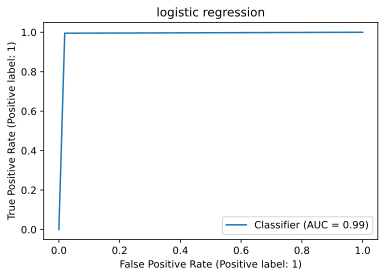

In [74]:
RocCurveDisplay.from_predictions(Y_test, lr_predict)
plt.title("logistic regression")

Text(0.5, 1.0, 'logistic regression with text')

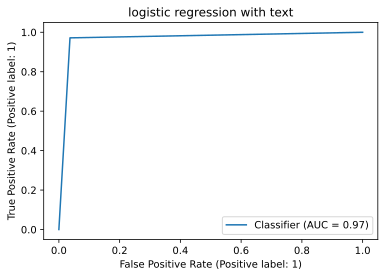

In [75]:
RocCurveDisplay.from_predictions(Y_text_test, logreg_text.predict(X_text_test))
plt.title("logistic regression with text")

## Decision Tree

In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree.score(X_test, Y_test)

0.99375

In [77]:
tree_text = DecisionTreeClassifier()
tree_text.fit(X_text_train, Y_text_train)
tree_text.score(X_text_test, Y_text_test)

0.9115384615384615

In [78]:
# exporting models
filename='./models/tree.sav'
pickle.dump(tree,open(filename,'wb'))
pickle.dump(tree_text, open('./models/tree_text.sav','wb'))

In [79]:
loaded_tree=pickle.load(open('./models/tree.sav','rb'))
loaded_text_tree = pickle.load(open('./models/tree_text.sav','rb'))

In [80]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

In [81]:
loaded_tree.predict(inp)

array([1])

In [82]:
loaded_text_tree.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [83]:
print("Tree:")
print(confusion_matrix(Y_test, loaded_tree.predict(X_test)))
print("Tree with text data:")
print(confusion_matrix(Y_text_test, loaded_text_tree.predict(X_text_test)))

Tree:
[[2059   14]
 [  12 2075]]
Tree with text data:
[[1888  190]
 [ 178 1904]]


In [84]:
# comparision reports
print("Classification report of tree:\n\n", classification_report(Y_test, loaded_tree.predict(X_test)))
print("\n")
print("Classification report of tree with text:\n\n", classification_report(Y_text_test, loaded_text_tree.predict(X_text_test)))

Classification report of tree:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2073
           1       0.99      0.99      0.99      2087

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Classification report of tree with text:

               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2078
           1       0.91      0.91      0.91      2082

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



In [85]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_tree.predict(X_test))
plt.title("Tree")

Text(0.5, 1.0, 'Tree')

Text(0.5, 1.0, 'Tree with text')

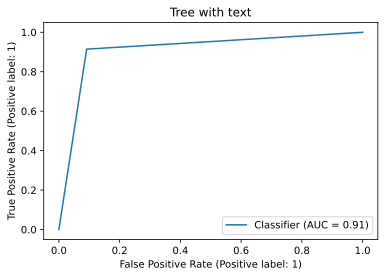

In [86]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_tree.predict(X_text_test))
plt.title("Tree with text")

## KNN

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8173076923076923

In [88]:
knn_text = KNeighborsClassifier()
knn_text.fit(X_text_train, Y_text_train)
knn_text.score(X_text_test, Y_text_test)

0.838701923076923

In [89]:
# exporting models
filename='./models/knn.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/knn_text.sav','wb'))

In [90]:
loaded_knn=pickle.load(open('./models/knn.sav','rb'))
loaded_text_knn = pickle.load(open('./models/knn_text.sav','rb'))

In [91]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_knn.predict(inp)

array([1])

In [92]:
loaded_text_knn.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [93]:
print("KNN:")
print(confusion_matrix(Y_test, loaded_knn.predict(X_test)))
print("KNN with text data:")
print(confusion_matrix(Y_text_test, loaded_text_knn.predict(X_text_test)))

KNN:
[[1317  756]
 [   4 2083]]
KNN with text data:
[[1631  447]
 [ 224 1858]]


In [94]:
# comparision reports
print("Classification report of KNN:\n\n", classification_report(Y_test, loaded_knn.predict(X_test)))
print("\n")
print("Classification report of KNN with text:\n\n", classification_report(Y_text_test, loaded_text_knn.predict(X_text_test)))

Classification report of KNN:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2073
           1       0.73      1.00      0.85      2087

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.86      0.82      0.81      4160



Classification report of KNN with text:

               precision    recall  f1-score   support

           0       0.88      0.78      0.83      2078
           1       0.81      0.89      0.85      2082

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'KNN')

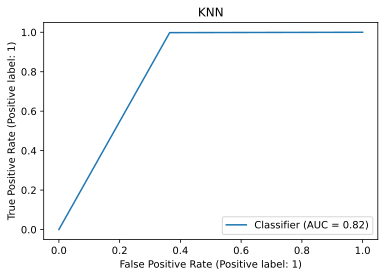

In [95]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_knn.predict(X_test))
plt.title("KNN")

Text(0.5, 1.0, 'KNN with text')

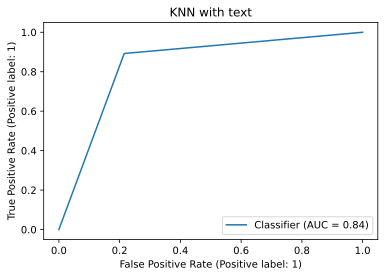

In [96]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_knn.predict(X_text_test))
plt.title("KNN with text")

## Naïve Bayes

In [97]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)
NB.score(X_test, Y_test)

0.9776442307692308

In [98]:
NB_text = BernoulliNB()
NB_text.fit(X_text_train, Y_text_train)
NB_text.score(X_text_test, Y_text_test)

0.7661057692307692

In [99]:
# exporting models
filename='./models/NB.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/NB_text.sav','wb'))

In [100]:
loaded_NB = pickle.load(open('./models/NB.sav','rb'))
loaded_text_NB = pickle.load(open('./models/NB_text.sav','rb'))

In [101]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_NB.predict(inp)

array([1])

In [102]:
loaded_text_NB.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [103]:
print("Naïve Bayes:")
print(confusion_matrix(Y_test, loaded_NB.predict(X_test)))
print("Naïve Bayes with text data:")
print(confusion_matrix(Y_text_test, loaded_text_NB.predict(X_text_test)))

Naïve Bayes:
[[1317  756]
 [   4 2083]]
Naïve Bayes with text data:
[[1631  447]
 [ 224 1858]]


In [104]:
# comparision reports
print("Classification report of Naïve Bayes:\n\n", classification_report(Y_test, loaded_NB.predict(X_test)))
print("\n")
print("Classification report of Naïve Bayes with text:\n\n", classification_report(Y_text_test, loaded_text_NB.predict(X_text_test)))

Classification report of Naïve Bayes:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2073
           1       0.73      1.00      0.85      2087

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.86      0.82      0.81      4160



Classification report of Naïve Bayes with text:

               precision    recall  f1-score   support

           0       0.88      0.78      0.83      2078
           1       0.81      0.89      0.85      2082

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'Naïve Bayes')

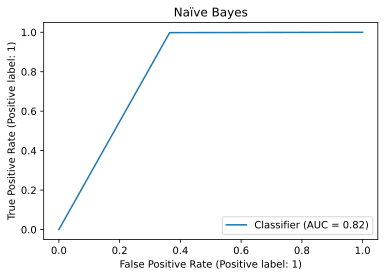

In [105]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_NB.predict(X_test))
plt.title("Naïve Bayes")

Text(0.5, 1.0, 'Naïve Bayes with text')

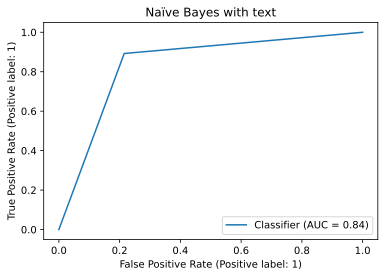

In [106]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_NB.predict(X_text_test))
plt.title("Naïve Bayes with text")

## SVM

In [107]:
SVM = SVC()
SVM.fit(X_train, Y_train)
SVM.score(X_test, Y_test)

0.9877403846153846

In [108]:
SVM_text = SVC()
SVM_text.fit(X_text_train, Y_text_train)
SVM_text.score(X_text_test, Y_text_test)

0.9235576923076924

In [109]:
# exporting models
filename='./models/SVM.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/SVM_text.sav','wb'))

In [110]:
loaded_SVM = pickle.load(open('./models/SVM.sav','rb'))
loaded_text_SVM = pickle.load(open('./models/SVM_text.sav','rb'))

In [111]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_SVM.predict(inp)

array([1])

In [112]:
loaded_text_SVM.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 1])

In [113]:
print("SVM:")
print(confusion_matrix(Y_test, loaded_SVM.predict(X_test)))
print("SVM with text data:")
print(confusion_matrix(Y_text_test, loaded_text_SVM.predict(X_text_test)))

SVM:
[[1317  756]
 [   4 2083]]
SVM with text data:
[[1631  447]
 [ 224 1858]]


In [114]:
# comparision reports
print("Classification report of SVM:\n\n", classification_report(Y_test, loaded_SVM.predict(X_test)))
print("\n")
print("Classification report of SVM with text:\n\n", classification_report(Y_text_test, loaded_text_SVM.predict(X_text_test)))

Classification report of SVM:

               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2073
           1       0.73      1.00      0.85      2087

    accuracy                           0.82      4160
   macro avg       0.87      0.82      0.81      4160
weighted avg       0.86      0.82      0.81      4160



Classification report of SVM with text:

               precision    recall  f1-score   support

           0       0.88      0.78      0.83      2078
           1       0.81      0.89      0.85      2082

    accuracy                           0.84      4160
   macro avg       0.84      0.84      0.84      4160
weighted avg       0.84      0.84      0.84      4160



Text(0.5, 1.0, 'SVM')

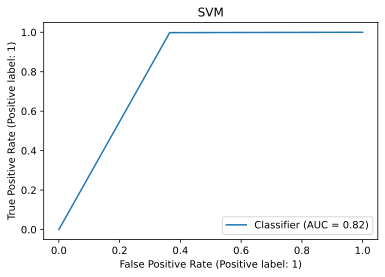

In [115]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_SVM.predict(X_test))
plt.title("SVM")

Text(0.5, 1.0, 'SVM with text')

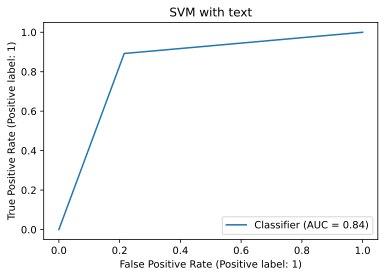

In [116]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_SVM.predict(X_text_test))
plt.title("SVM with text")

# Processing Time

In [117]:
# device
!uname -a

Linux d37fbe84b829 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


In [118]:
!sudo apt install lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids pciutils usb.ids usbutils
The following NEW packages will be installed:
  libpci3 lshw pci.ids pciutils usb.ids usbutils
0 upgraded, 6 newly installed, 0 to remove and 23 not upgraded.
Need to get 820 kB of archives.
After this operation, 3,380 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 pci.ids all 0.0~2020.03.20-1 [217 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpci3 amd64 1:3.6.4-1ubuntu0.20.04.1 [26.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 lshw amd64 02.18.85-0.3ubuntu2.20.04.1 [271 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 pciutils amd64 1:3.6.4-1ubuntu0.20.04.1 [56.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/main amd64 usb.ids all 2020.03.19-1 [176 kB]
Get:6 http://archive.ub

In [119]:
!sudo lshw

d37fbe84b829
    description: Computer
    width: 64 bits
    capabilities: smp vsyscall32
  *-core
       description: Motherboard
       physical id: 0
     *-memory
          description: System memory
          physical id: 0
          size: 12GiB
     *-cpu
          product: Intel(R) Xeon(R) CPU @ 2.20GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          width: 64 bits
          capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
     *-pci
          description: Host bridge
  

In [120]:
!sudo lshw -short

H/W path    Device  Class          Description
                    system         Computer
/0                  bus            Motherboard
/0/0                memory         12GiB System memory
/0/1                processor      Intel(R) Xeon(R) CPU @ 2.20GHz
/0/100              bridge         440FX - 82441FX PMC [Natoma]
/0/100/1            bridge         82371AB/EB/MB PIIX4 ISA
/0/100/1.3          bridge         82371AB/EB/MB PIIX4 ACPI
/0/100/3            generic        Virtio SCSI
/0/100/3/0          generic        Virtual I/O device
/0/100/4            network        Virtio network device
/0/100/4/0          network        Virtual I/O device
/0/100/5            generic        Virtio memory balloon
/0/100/5/0          generic        Virtual I/O device
/0/100/6            generic        Virtio RNG
/0/100/6/0          generic        Virtual I/O device
/0/2                system         PnP device PNP0b00
/0/3                input          PnP device PNP0303
/0/4                input  

In [121]:
import time
import random
def avgTime(model:'Object',test_input:'numpy.ndarray',*, n_iters=10) -> float:
    times = np.empty((n_iters,))
    for _ in range(n_iters):
        idx = random.randint(0,200)
        start = time.time()
        model.predict(test_input[idx])
        end = time.time()
        times[_] = end - start
    print(avgtime:=np.mean(times)," s  |  ", avgtime*1000," ms  |  ", avgtime*1000000, " µs")
    return avgtime

In [129]:
# logreg - we can finetune using GridSearchCV
avgTime(loaded_model,X_test,n_iters=10)

0.00039861202239990237  s  |   0.39861202239990234  ms  |   398.61202239990234  µs


0.00039861202239990237

In [131]:
# logreg with text
avgTime(loaded_text_model, X_text_test)

0.0003599405288696289  s  |   0.3599405288696289  ms  |   359.9405288696289  µs


0.0003599405288696289

In [137]:
# Decision tree
avgTime(loaded_tree,X_test,n_iters=10)
# Decision Tree with text
avgTime(loaded_text_tree, X_text_test)

0.0004979133605957031  s  |   0.4979133605957031  ms  |   497.9133605957031  µs
0.0006865024566650391  s  |   0.6865024566650391  ms  |   686.5024566650391  µs


0.0006865024566650391

In [140]:
# KNN
avgTime(loaded_knn,X_test,n_iters=10)
# KNN with text
avgTime(loaded_text_knn, X_text_test)

0.006875395774841309  s  |   6.875395774841309  ms  |   6875.395774841309  µs
0.22443811893463134  s  |   224.43811893463135  ms  |   224438.11893463135  µs


0.22443811893463134

In [141]:
# Naive Bayes
avgTime(loaded_NB,X_test)
# Naive Bayes with text
avgTime(loaded_text_NB, X_text_test)

0.006802415847778321  s  |   6.80241584777832  ms  |   6802.41584777832  µs
0.22807304859161376  s  |   228.07304859161377  ms  |   228073.04859161377  µs


0.22807304859161376

In [143]:
# SVM
avgTime(loaded_SVM, X_test)
# SVM with text
avgTime(loaded_text_SVM, X_text_test)

0.007373428344726563  s  |   7.3734283447265625  ms  |   7373.4283447265625  µs
0.23015379905700684  s  |   230.15379905700684  ms  |   230153.79905700684  µs


0.23015379905700684